<a href="https://colab.research.google.com/github/DarkLord-13/Machine-Learning-01/blob/main/PotatoDiseaseClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d emmarex/plantdisease

 97% 640M/658M [00:05<00:00, 187MB/s]
100% 658M/658M [00:05<00:00, 120MB/s]


In [4]:
from zipfile import ZipFile

dataset = '/content/plantdisease.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('dataset is extracted')

dataset is extracted


In [5]:
import os
# counting the number of files in each dataset folder
path, dirs, files = next(os.walk('/content/PlantVillage/Pepper__bell___Bacterial_spot'))
file_count = len(files)
print("Number of Images:  ", file_count)

Number of Images:   997


In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import cv2

In [7]:
# resizing the image
# creating a single list which has the path of all the images

labels = []
image_path_list = []
# potato early blight -> 0
# potato late blight -> 1
# healthy -> 2

##############
train_data_folder_path = '/content/PlantVillage/Potato___Early_blight/'
filename = os.listdir('/content/PlantVillage/Potato___Early_blight')
for i in range(1000):
  labels.append(0)
  img_path = train_data_folder_path + str(filename[i])

  img = Image.open(img_path)
  img = img.resize((128, 128))
  img = img.convert('RGB')
  img.save(img_path)

  image_path_list.append(img_path)

##############
train_data_folder_path = '/content/PlantVillage/Potato___Late_blight/'
filename = os.listdir('/content/PlantVillage/Potato___Late_blight')
for i in range(1000):
  labels.append(1)
  img_path = train_data_folder_path + str(filename[i])

  img = Image.open(img_path)
  img = img.resize((128, 128))
  img = img.convert('RGB')
  img.save(img_path)

  image_path_list.append(img_path)

##############
train_data_folder_path = '/content/PlantVillage/Potato___healthy/'
filename = os.listdir('/content/PlantVillage/Potato___healthy')
for i in range(152):
  labels.append(2)
  img_path = train_data_folder_path + str(filename[i])

  img = Image.open(img_path)
  img = img.resize((128, 128))
  img = img.convert('RGB')
  img.save(img_path)

  image_path_list.append(img_path)

In [8]:
image = mpimg.imread(image_path_list[200])
image = np.array(image)
image.shape

(128, 128, 3)

In [9]:
print(len(image_path_list))

2152


In [10]:
images_numpy_list = []

for i in range(len(image_path_list)):
  image = mpimg.imread(image_path_list[i])
  image = np.array(image)
  images_numpy_list.append(image)

print(len(images_numpy_list))

2152


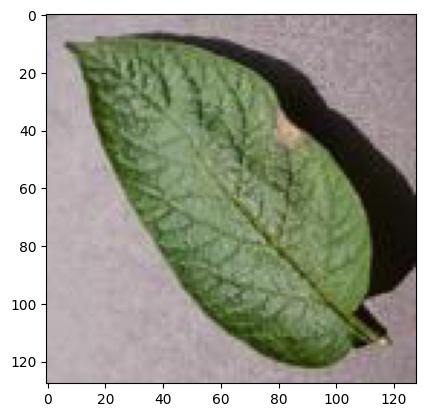

In [11]:
img = Image.open(image_path_list[1758])  # this iwll read the image file
imgplot = plt.imshow(img)
plt.show()

In [12]:
#counting the images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1 2]
[1000 1000  152]


In [13]:
# converting image list and label list to numpy arrays
x = np.array(images_numpy_list)
y = np.array(labels)

In [14]:
print(x.shape)
print(y.shape)

(2152, 128, 128, 3)
(2152,)


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=2, stratify=y)
print(x.shape, x_train.shape, x_test.shape)

(2152, 128, 128, 3) (1721, 128, 128, 3) (431, 128, 128, 3)


In [16]:
# to check if the dataset was eually splitted in training and testing data with respect to different objects
from collections import OrderedDict

res =  [(el, list(y_train).count(el)) for el in list(y_train)]
print(list(OrderedDict(res).items()))

[(0, 800), (1, 800), (2, 121)]


In [17]:
x_train_scaled = x_train/255;
x_test_scaled = x_test/255

In [18]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras import optimizers

num_of_classes = 4
convolutional_base = DenseNet201(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

model = models.Sequential()
model.add(layers.UpSampling2D((2, 2)))
model.add(convolutional_base)
model.add(layers.Flatten()) # converts the matrix in 1-D
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) # turns off a few neurons to prevent over-fitting
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

model.compile(optimizer='adamax', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=15)

74836368/74836368 [==============================] - 0s 0us/step
Epoch 1/15
49/49 [==============================] - 182s 944ms/step - loss: 0.6410 - acc: 0.7771 - val_loss: 1.1381 - val_acc: 0.3699
Epoch 2/15
49/49 [==============================] - 33s 676ms/step - loss: 0.2783 - acc: 0.9264 - val_loss: 2.1343 - val_acc: 0.5029
Epoch 3/15
49/49 [==============================] - 33s 665ms/step - loss: 0.1605 - acc: 0.9722 - val_loss: 0.8590 - val_acc: 0.7572
Epoch 4/15
49/49 [==============================] - 33s 671ms/step - loss: 0.1453 - acc: 0.9761 - val_loss: 0.9116 - val_acc: 0.7688
Epoch 5/15
49/49 [==============================] - 33s 673ms/step - loss: 0.1120 - acc: 0.9793 - val_loss: 1.3160 - val_acc: 0.6301
Epoch 6/15
49/49 [==============================] - 33s 673ms/step - loss: 0.1071 - acc: 0.9761 - val_loss: 0.4592 - val_acc: 0.8497
Epoch 7/15
49/49 [==============================] - 33s 665ms/step - loss: 0.0757 - acc: 0.9890 - val_loss: 0.9884 - val_acc: 0.7399
Epo

In [19]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)

14/14 [==============================] - 6s 417ms/step - loss: 0.0180 - acc: 0.9954


In [20]:
print("test accuracy for DenseNet201 = ", round(accuracy, 2)*100,"%")

test accuracy for DenseNet201 =  100.0 %


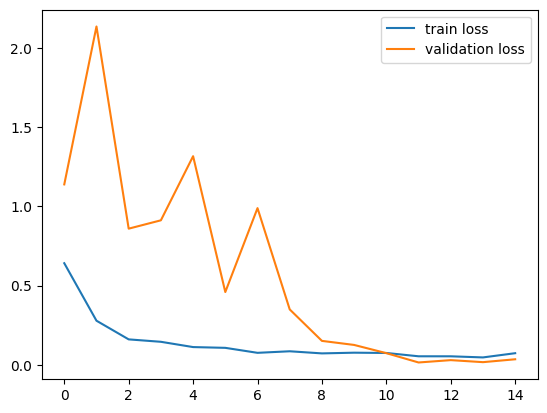

In [21]:
h = history

# plot the loss function value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

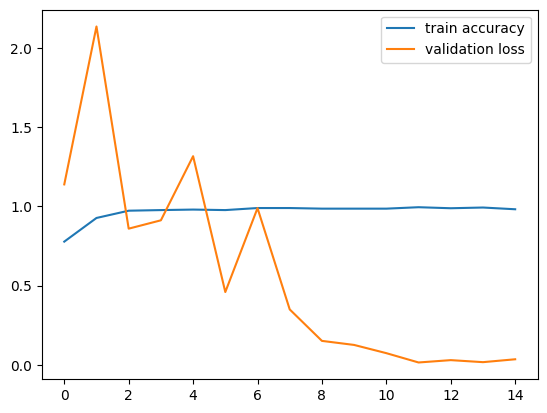

In [22]:
# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

Saving the Model

In [24]:
# already saved
# model.save('/content/drive/MyDrive/PotatoDiseaseClassificationTrainedModel')

In [25]:
# already saved
# model.save('/content/PotatoDiseaseClassificationModel1')